# Summaries, Conclusions, and Recommendations

Below, I'll lay out some of the summaries of my testing and provide some recommendations for investors looking to generate a return.

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
lasso_coefs = pd.read_csv('../datasets/coefs/lasso_coefs.csv')
ridge_coefs = pd.read_csv('../datasets/coefs/ridge_coefs.csv')
linreg_coefs = pd.read_csv('../datasets/coefs/lr_coefs.csv')

### Summary of model scores

|            | **RMSE Score on Test Data (20% of original dataset)** | **RMSE Score on Kaggle Data** |
|------------|-----------------------------------------------------------|-------------------------------|
| **LinReg** |                 <center>19742.57</center>                 | <center>21196.37</center>     |
| **Ridge**  |                 <center>17989.53</center>                 | <center>21378.05</center>     |
| **Lasso**  |                 <center>19691.29</center>                 | <center>21926.43</center>     |

### Comparing Model Coefficients

In [143]:
def rename_columns_and_sort(data):
    return data.rename(columns={'Unnamed: 0' : 'Features'}).sort_values(by='Coefficients')

In [148]:
lasso_coefs = rename_columns_and_sort(lasso_coefs)
ridge_coefs = rename_columns_and_sort(ridge_coefs)
linreg_coefs = rename_columns_and_sort(linreg_coefs)

In [163]:
def remove_uninterpretable_coefs(data):
    return data[(data['Features'].str.contains(' x ') == False) & (data['Features'].str.contains('log') == False) & (data['Features'].str.contains('\^') == False)]

In [164]:
lasso_coefs_remove_uninterpretables = remove_uninterpretable_coefs(lasso_coefs)
ridge_coefs_remove_uninterpretables = remove_uninterpretable_coefs(ridge_coefs)
linreg_coefs_remove_uninterpretables = remove_uninterpretable_coefs(linreg_coefs)

In [165]:
lasso_coefs_remove_uninterpretables

,Features,Coefficients
242,age_of_home,-8440.948193
171,Exter Qual_Gd,-7006.718697
178,Bsmt Qual_Gd,-5769.097000
200,Kitchen Qual_TA,-5762.395521
199,Kitchen Qual_Gd,-5462.809673
...,...,...
162,Sale Type_New,3454.289101
114,Neighborhood_StoneBr,3494.809847
4,Overall Cond,5536.138365
9,Total Bsmt SF,6501.106326


In [166]:
lasso_best_worst = pd.concat([lasso_coefs_remove_uninterpretables.head(), lasso_coefs_remove_uninterpretables.tail()])

In [167]:
ridge_best_worst = pd.concat([ridge_coefs_remove_uninterpretables.head(), ridge_coefs_remove_uninterpretables.tail()])

In [168]:
linreg_best_worst = pd.concat([linreg_coefs_remove_uninterpretables.head(), linreg_coefs_remove_uninterpretables.tail()])

Text(0.5, 1.0, 'Coefficient Values for Lasso Regression Model')

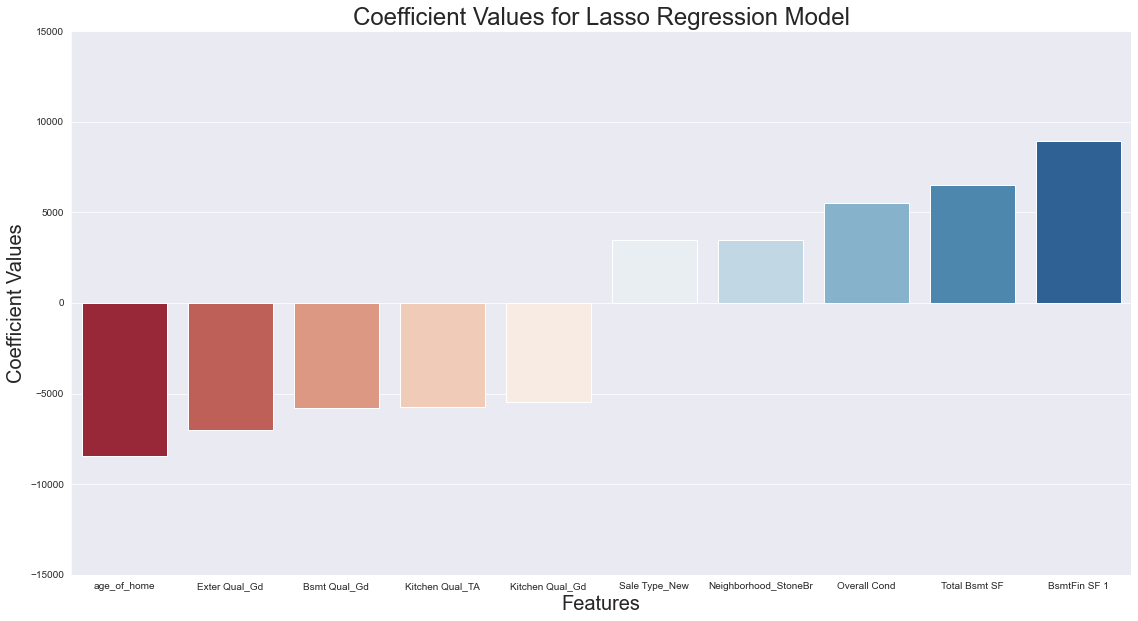

In [174]:
plt.figure(figsize=(19,10))
sns.set_style('darkgrid')
sns.barplot(lasso_best_worst['Features'], lasso_best_worst['Coefficients'], palette='RdBu')
plt.ylim(-15000, 15000)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Coefficient Values', fontsize=20)
plt.title('Coefficient Values for Lasso Regression Model', fontsize=24)

Text(0.5, 1.0, 'Coefficient Values for Ridge Regression Model')

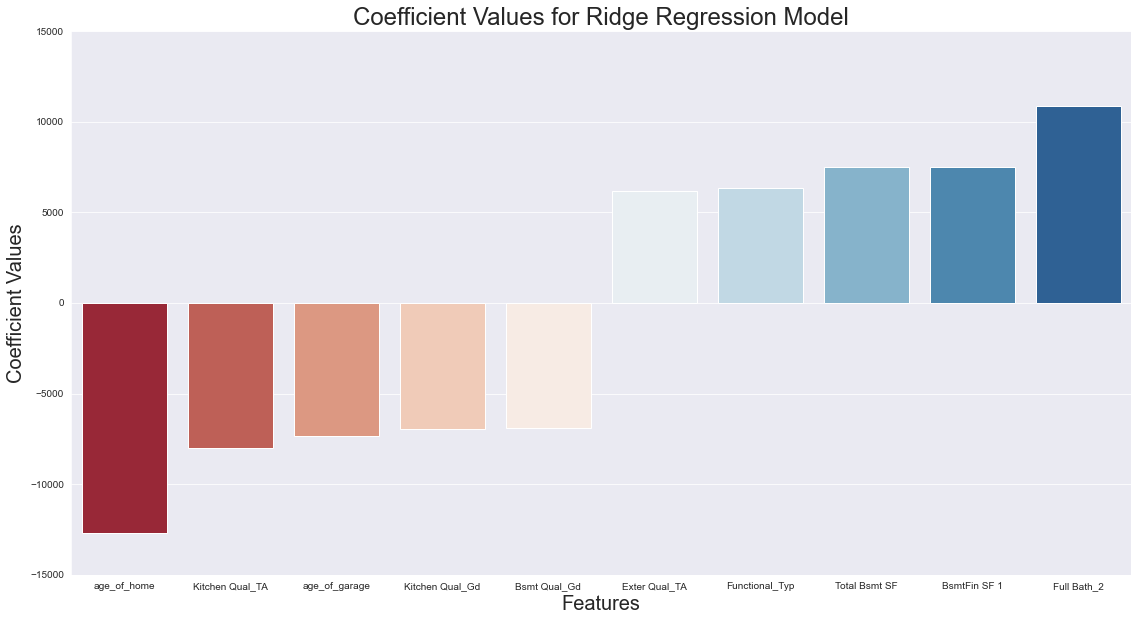

In [173]:
plt.figure(figsize=(19,10))
sns.set_style('darkgrid')
sns.barplot(ridge_best_worst['Features'], ridge_best_worst['Coefficients'], palette='RdBu')
plt.ylim(-15000, 15000)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Coefficient Values', fontsize=20)
plt.title('Coefficient Values for Ridge Regression Model', fontsize=24)

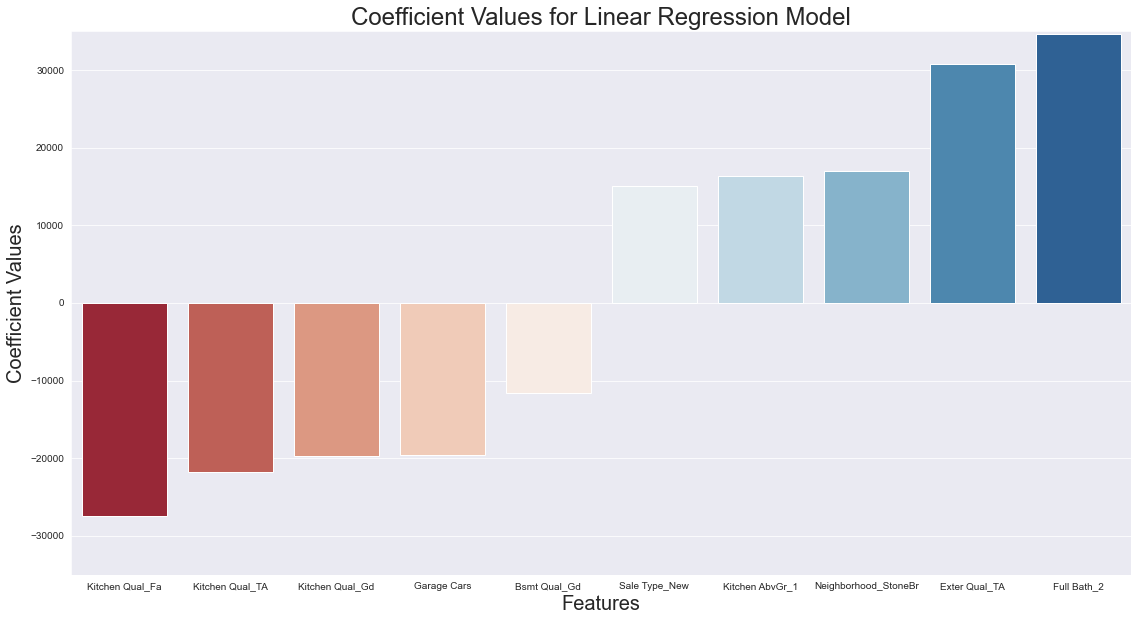

In [175]:
plt.figure(figsize=(19,10))
sns.set_style('darkgrid')
sns.barplot(linreg_best_worst['Features'], linreg_best_worst['Coefficients'], palette='RdBu')
plt.ylim(-35000, 35000)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Coefficient Values', fontsize=20)
plt.title('Coefficient Values for Linear Regression Model', fontsize=24)
plt.savefig('../images/Coef_vals_linreg.png');

After running all the tests on the data, I've come to the following conclusions about the **best ways to improve a home's value**:
* Remodel your kitchen! The quality of a kitchen may impact a home price approximately 20000 dollars when all other variables are held constant.
* Remodel your basement! Similar to kitchens, we see that the quality of a basement (falling from Excellent to Good) may affect the price of a home by about -11000 dollars if all other variables are held constant
* While it's a pricey endeavor, adding a second bathroom may drastically increase your home's value. Estimates range between 12,000-35,000 dollars when all other variables are held constant
* Look for cheap sales in Stone Brook, the neighborhood is booming!

And some conclusions about the models I ran:
* The Lasso model seemed to perform the most consistently, though the many interaction terms made the results difficult to interpret literally. I was able to detect trends across the three models that led me to my conclusions.
* A simpler model with less features would sacrifice accuracy for the sake of a clearer, actionable understanding of the correlation of features to sale price